In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
hyd_data=pd.read_csv('data/Hyd_house_rent_data.csv')
hyd_data.head()

,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,property_size,reactivationSource,rent_amount,sharedAccomodation,shortUrl,swimmingPool,totalFloor,type_bhk,waterSupply,weight
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3,3,NaN,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,...,2200,USER_DASHBOARD,28000,False,http://nobr.kr/sv/9Kvqj,False,5,BHK3,CORP_BORE,NaN
1,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Inner Ring Rd, near RTO Bandlaguda South Zone",45000,E,East,2,...,1200,USER_DASHBOARD,15000,False,http://nobr.kr/sv/j2pD6,False,2,BHK3,BOREWELL,NaN
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3,3,NaN,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,...,1800,MISSED_CALL,16000,False,http://nobr.kr/sv/TXJmj,False,3,BHK3,CORP_BORE,NaN
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,...,750,MISSED_CALL,9000,False,http://nobr.kr/sv/FnCsf,False,2,BHK2,CORP_BORE,NaN
4,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2,2,NaN,"Madhapur HUDA Techno Enclave, Near MaxCure Su...",80000,E,East,2,...,1250,None,32500,False,http://nobr.kr/sv/BQFRb,False,5,BHK2,CORP_BORE,NaN


In [3]:
hyd_data.columns

Index(['active', 'amenities', 'balconies', 'bathroom', 'combineDescription',
       'completeStreetName', 'deposit', 'facing', 'facingDesc', 'floor',
       'furnishingDesc', 'gym', 'id', 'isMaintenance', 'lift', 'loanAvailable',
       'locality', 'localityId', 'location', 'maintenanceAmount', 'ownerName',
       'parking', 'parkingDesc', 'propertyTitle', 'propertyType',
       'property_age', 'property_size', 'reactivationSource', 'rent_amount',
       'sharedAccomodation', 'shortUrl', 'swimmingPool', 'totalFloor',
       'type_bhk', 'waterSupply', 'weight'],
      dtype='object')

In [4]:
hyd_data.groupby('waterSupply').size()

waterSupply
BOREWELL       1335
CORPORATION    1586
CORP_BORE      6965
None           9224
dtype: int64

In [5]:
hyd_data.groupby('facingDesc').size()

facingDesc
Don't Know     237
East          4487
North         1726
North-East     720
North-West      78
South          318
South-East     102
South-West      32
West          1869
dtype: int64

In [6]:
hyd_data[hyd_data['facingDesc']=='West']

,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,property_size,reactivationSource,rent_amount,sharedAccomodation,shortUrl,swimmingPool,totalFloor,type_bhk,waterSupply,weight
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3,3,NaN,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,...,2200,USER_DASHBOARD,28000,False,http://nobr.kr/sv/9Kvqj,False,5,BHK3,CORP_BORE,NaN
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,...,750,MISSED_CALL,9000,False,http://nobr.kr/sv/FnCsf,False,2,BHK2,CORP_BORE,NaN
12,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",2,2,NaN,"Bollaram Road, Miyapur, BDL Colony, Rangapuram...",40000,W,West,4,...,1750,USER_DASHBOARD,20000,False,http://nobr.kr/sv/j8pK8,True,13,BHK3,CORP_BORE,NaN
15,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",2,4,NaN,"Jayabheri Pine Valley, Udaya Elite, besides Ja...",150000,W,West,3,...,3200,PROPERTY_DASHBOARD,50000,False,http://nobr.kr/sv/49vwj,False,5,BHK4,CORP_BORE,NaN
19,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Dharmareddy colony near ICICI Bank Kukatpally,",50000,W,West,3,...,1100,None,18000,False,http://nobr.kr/sv/1pwHj,False,3,BHK2,CORP_BORE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",3,1,NaN,"bk Reddy Nagar, opp. Huda park",11000,W,West,3,...,300,OWNER,5500,False,http://nobr.kr/sv/qC28,False,3,RK1,CORP_BORE,NaN
19010,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",2,3,NaN,"KPHB 5th Phase, Kukatpally, Hyderabad, Telanga...",80000,W,West,8,...,1782,None,40000,False,http://nobr.kr/sv/1Bt9g,True,27,BHK3,CORPORATION,NaN
19032,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",None,2,NaN,opp. Jntu Near Amrutha Apartment and Pragathi ...,26000,W,West,2,...,1250,None,13000,False,http://nobr.kr/sv/fhB8g,False,4,BHK3,CORPORATION,NaN
19077,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",None,2,NaN,"Anand Bagh Main Rd, ANR Nagar Colony NEAR Ri...",30000,W,West,0,...,1100,None,10000,False,http://nobr.kr/sv/Wjn6g,False,1,BHK2,CORP_BORE,NaN


In [7]:
hyd_data.columns

Index(['active', 'amenities', 'balconies', 'bathroom', 'combineDescription',
       'completeStreetName', 'deposit', 'facing', 'facingDesc', 'floor',
       'furnishingDesc', 'gym', 'id', 'isMaintenance', 'lift', 'loanAvailable',
       'locality', 'localityId', 'location', 'maintenanceAmount', 'ownerName',
       'parking', 'parkingDesc', 'propertyTitle', 'propertyType',
       'property_age', 'property_size', 'reactivationSource', 'rent_amount',
       'sharedAccomodation', 'shortUrl', 'swimmingPool', 'totalFloor',
       'type_bhk', 'waterSupply', 'weight'],
      dtype='object')

In [8]:
data=hyd_data[['localityId','type_bhk','balconies','bathroom','parking','lift','furnishingDesc','maintenanceAmount','property_size','gym','swimmingPool','waterSupply','rent_amount']]
data.head()

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,maintenanceAmount,property_size,gym,swimmingPool,waterSupply,rent_amount
0,gachibowli_hyderabad,BHK3,3,3,BOTH,True,Semi,2000,2200,False,False,CORP_BORE,28000
1,chandrayangutta_hyderabad,BHK3,1,2,TWO_WHEELER,False,Unfurnished,None,1200,False,False,BOREWELL,15000
2,manikonda_hyderabad,BHK3,3,3,BOTH,True,Semi,1000,1800,True,False,CORP_BORE,16000
3,NOT_FOUND,BHK2,1,2,BOTH,False,Unfurnished,500,750,False,False,CORP_BORE,9000
4,hitech_city_hyderabad,BHK2,2,2,BOTH,True,Semi,2000,1250,False,False,CORP_BORE,32500


In [9]:
data.shape

(19110, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   localityId         19110 non-null  object
 1   type_bhk           19110 non-null  object
 2   balconies          19110 non-null  object
 3   bathroom           19110 non-null  int64 
 4   parking            19110 non-null  object
 5   lift               19110 non-null  bool  
 6   furnishingDesc     19110 non-null  object
 7   maintenanceAmount  19110 non-null  object
 8   property_size      19110 non-null  int64 
 9   gym                19110 non-null  bool  
 10  swimmingPool       19110 non-null  bool  
 11  waterSupply        19110 non-null  object
 12  rent_amount        19110 non-null  int64 
dtypes: bool(3), int64(3), object(7)
memory usage: 1.5+ MB


In [11]:
data.replace({'balconies':{'None':int(0)}},inplace=True)
data.replace({'maintenanceAmount':{'None':int(0)}},inplace=True)
data['balconies'] = data['balconies'].apply(lambda x:int(x))
data['maintenance']=data['maintenanceAmount'].apply(lambda x:int(x))
data.drop(['maintenanceAmount'],axis=1,inplace= True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   localityId      19110 non-null  object
 1   type_bhk        19110 non-null  object
 2   balconies       19110 non-null  int64 
 3   bathroom        19110 non-null  int64 
 4   parking         19110 non-null  object
 5   lift            19110 non-null  bool  
 6   furnishingDesc  19110 non-null  object
 7   property_size   19110 non-null  int64 
 8   gym             19110 non-null  bool  
 9   swimmingPool    19110 non-null  bool  
 10  waterSupply     19110 non-null  object
 11  rent_amount     19110 non-null  int64 
 12  maintenance     19110 non-null  int64 
dtypes: bool(3), int64(5), object(5)
memory usage: 1.5+ MB


In [13]:
data.localityId.unique().size

269

In [14]:
data.isnull().sum()

localityId        0
type_bhk          0
balconies         0
bathroom          0
parking           0
lift              0
furnishingDesc    0
property_size     0
gym               0
swimmingPool      0
waterSupply       0
rent_amount       0
maintenance       0
dtype: int64

In [15]:
data.furnishingDesc.unique()

array(['Semi', 'Unfurnished', 'Full'], dtype=object)

In [16]:
data.parking.unique()

array(['BOTH', 'TWO_WHEELER', 'FOUR_WHEELER', 'NONE'], dtype=object)

In [17]:
data.type_bhk.unique()

array(['BHK3', 'BHK2', 'BHK1', 'BHK4', 'RK1', 'BHK4PLUS'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
data['furnishingDesc']=le.fit_transform(data['furnishingDesc'])

In [20]:
data.head()

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance
0,gachibowli_hyderabad,BHK3,3,3,BOTH,True,1,2200,False,False,CORP_BORE,28000,2000
1,chandrayangutta_hyderabad,BHK3,1,2,TWO_WHEELER,False,2,1200,False,False,BOREWELL,15000,0
2,manikonda_hyderabad,BHK3,3,3,BOTH,True,1,1800,True,False,CORP_BORE,16000,1000
3,NOT_FOUND,BHK2,1,2,BOTH,False,2,750,False,False,CORP_BORE,9000,500
4,hitech_city_hyderabad,BHK2,2,2,BOTH,True,1,1250,False,False,CORP_BORE,32500,2000


In [21]:
data['type_bhk']=le.fit_transform(data['type_bhk'])
data['parking']=le.fit_transform(data['parking'])
data['lift']=le.fit_transform(data['lift'])
data['gym']=le.fit_transform(data['gym'])
data['swimmingPool']=le.fit_transform(data['swimmingPool'])
data['waterSupply']=le.fit_transform(data['waterSupply'])

In [22]:
category_mapping = {label: category for label, category in zip(hyd_data['type_bhk'], data['type_bhk'])}
print("Category Mapping:")
for label, category in category_mapping.items():
    print(f"{category}: {label}")

Category Mapping:
2: BHK3
1: BHK2
0: BHK1
3: BHK4
5: RK1
4: BHK4PLUS


In [23]:
data.head()

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance
0,gachibowli_hyderabad,2,3,3,0,1,1,2200,0,0,2,28000,2000
1,chandrayangutta_hyderabad,2,1,2,3,0,2,1200,0,0,0,15000,0
2,manikonda_hyderabad,2,3,3,0,1,1,1800,1,0,2,16000,1000
3,NOT_FOUND,1,1,2,0,0,2,750,0,0,2,9000,500
4,hitech_city_hyderabad,1,2,2,0,1,1,1250,0,0,2,32500,2000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   localityId      19110 non-null  object
 1   type_bhk        19110 non-null  int32 
 2   balconies       19110 non-null  int64 
 3   bathroom        19110 non-null  int64 
 4   parking         19110 non-null  int32 
 5   lift            19110 non-null  int64 
 6   furnishingDesc  19110 non-null  int32 
 7   property_size   19110 non-null  int64 
 8   gym             19110 non-null  int64 
 9   swimmingPool    19110 non-null  int64 
 10  waterSupply     19110 non-null  int32 
 11  rent_amount     19110 non-null  int64 
 12  maintenance     19110 non-null  int64 
dtypes: int32(4), int64(8), object(1)
memory usage: 1.6+ MB


In [25]:
data.describe()

,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance
count,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000
mean,1.272109,0.742491,1.911826,1.325013,0.319990,1.384563,1067.674411,0.076504,0.081947,2.259969,14919.719362,809.927682
std,1.183933,1.682343,0.764841,1.414812,0.466484,0.630435,549.019152,0.265810,0.274291,0.881796,9623.547307,1345.363049
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,700.000000,0.000000,0.000000,2.000000,8999.000000,0.000000
50%,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1000.000000,0.000000,0.000000,2.000000,12500.000000,0.000000
75%,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1334.000000,0.000000,0.000000,3.000000,18000.000000,1300.000000
max,5.000000,120.000000,14.000000,3.000000,1.000000,2.000000,12000.000000,1.000000,1.000000,3.000000,100000.000000,32000.000000


In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [27]:
#columns_to_standaradize=['maintenanceAmount','property_size']
#data[columns_to_standaradize]=sc.fit_transform(data[columns_to_standaradize])

In [28]:
data.head()

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance
0,gachibowli_hyderabad,2,3,3,0,1,1,2200,0,0,2,28000,2000
1,chandrayangutta_hyderabad,2,1,2,3,0,2,1200,0,0,0,15000,0
2,manikonda_hyderabad,2,3,3,0,1,1,1800,1,0,2,16000,1000
3,NOT_FOUND,1,1,2,0,0,2,750,0,0,2,9000,500
4,hitech_city_hyderabad,1,2,2,0,1,1,1250,0,0,2,32500,2000


In [29]:
locality_count=data.groupby('localityId')['localityId'].count().sort_values(ascending=False)
locality_count

localityId
NOT_FOUND                                 3491
kondapur_hyderabad                        1338
kukatpally_hyderabad                      1146
miyapur_hyderabad                          721
hafeezpet_hyderabad                        663
                                          ... 
maharaja_ranjeet_singh_nagar_hyderabad       1
majeedpur_hyderabad                          1
chanchalguda_hyderabad                       1
east_bahadurpura_hyderabad                   1
asmangadh_hyderabad                          1
Name: localityId, Length: 269, dtype: int64

In [30]:
locality_10=locality_count[locality_count<=10]
locality_10

localityId
bairagiguda_hyderabad                     10
nampally_hyderabad                        10
kanchan_bagh_hyderabad                    10
koti_hyderabad                            10
auto_nagar_hyderabad                      10
                                          ..
maharaja_ranjeet_singh_nagar_hyderabad     1
majeedpur_hyderabad                        1
chanchalguda_hyderabad                     1
east_bahadurpura_hyderabad                 1
asmangadh_hyderabad                        1
Name: localityId, Length: 119, dtype: int64

In [31]:
data['localityId']=data['localityId'].apply(lambda x: 'NOT_FOUND' if x in locality_10 else x)

In [32]:
data.head()

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance
0,gachibowli_hyderabad,2,3,3,0,1,1,2200,0,0,2,28000,2000
1,NOT_FOUND,2,1,2,3,0,2,1200,0,0,0,15000,0
2,manikonda_hyderabad,2,3,3,0,1,1,1800,1,0,2,16000,1000
3,NOT_FOUND,1,1,2,0,0,2,750,0,0,2,9000,500
4,hitech_city_hyderabad,1,2,2,0,1,1,1250,0,0,2,32500,2000


In [33]:
data.groupby('localityId')['localityId'].count().sort_values(ascending=False)

localityId
NOT_FOUND                     3988
kondapur_hyderabad            1338
kukatpally_hyderabad          1146
miyapur_hyderabad              721
hafeezpet_hyderabad            663
                              ... 
sri_nagar_colony_hyderabad      11
gurram_guda_hyderabad           11
sivarampalli_hyderabad          11
kuntloor_hyderabad              11
buddha_nagar_hyderabad          11
Name: localityId, Length: 150, dtype: int64

In [34]:
data['rent_per_sqft']=data['rent_amount']/data['property_size']

In [35]:
data.head()

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance,rent_per_sqft
0,gachibowli_hyderabad,2,3,3,0,1,1,2200,0,0,2,28000,2000,12.727273
1,NOT_FOUND,2,1,2,3,0,2,1200,0,0,0,15000,0,12.500000
2,manikonda_hyderabad,2,3,3,0,1,1,1800,1,0,2,16000,1000,8.888889
3,NOT_FOUND,1,1,2,0,0,2,750,0,0,2,9000,500,12.000000
4,hitech_city_hyderabad,1,2,2,0,1,1,1250,0,0,2,32500,2000,26.000000


In [36]:
def outliers_rps(data):
    q1 = data.rent_per_sqft.quantile(0.25)
    q3 = data.rent_per_sqft.quantile(0.75)
    iqr = q3 - q1
    df = data[(data.rent_per_sqft > (q1 - 1.5 * iqr)) & (data.rent_per_sqft < (q3 + 1.5 * iqr))]
    #print(df)
    return df 


In [37]:
df1=outliers_rps(data)
df1

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance,rent_per_sqft
0,gachibowli_hyderabad,2,3,3,0,1,1,2200,0,0,2,28000,2000,12.727273
1,NOT_FOUND,2,1,2,3,0,2,1200,0,0,0,15000,0,12.500000
2,manikonda_hyderabad,2,3,3,0,1,1,1800,1,0,2,16000,1000,8.888889
3,NOT_FOUND,1,1,2,0,0,2,750,0,0,2,9000,500,12.000000
4,hitech_city_hyderabad,1,2,2,0,1,1,1250,0,0,2,32500,2000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,rai_durg_hyderabad,0,0,1,0,1,2,500,0,0,3,8500,500,17.000000
19106,NOT_FOUND,1,2,2,0,0,2,900,0,0,0,8500,500,9.444444
19107,moosapet_hyderabad,1,0,3,0,0,2,1150,0,0,3,15000,0,13.043478
19108,NOT_FOUND,0,0,1,3,0,2,500,0,0,3,7000,0,14.000000


In [38]:
df1.shape

(18252, 14)

In [39]:
df1.groupby('balconies').size().sort_values(ascending=False)

balconies
0      9733
1      4413
2      3374
3       638
4        82
5         9
6         1
12        1
120       1
dtype: int64

In [40]:
df2=df1[df1['balconies']<5]
df2.shape

(18240, 14)

In [41]:
df2.groupby('bathroom').size().sort_values(ascending=False)

bathroom
2     9710
1     5075
3     3189
4      191
5       48
6       15
7        7
8        3
12       1
14       1
dtype: int64

In [42]:
df2=df2[df2['bathroom']<8]
df2.shape

(18235, 14)

In [43]:
df2

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance,rent_per_sqft
0,gachibowli_hyderabad,2,3,3,0,1,1,2200,0,0,2,28000,2000,12.727273
1,NOT_FOUND,2,1,2,3,0,2,1200,0,0,0,15000,0,12.500000
2,manikonda_hyderabad,2,3,3,0,1,1,1800,1,0,2,16000,1000,8.888889
3,NOT_FOUND,1,1,2,0,0,2,750,0,0,2,9000,500,12.000000
4,hitech_city_hyderabad,1,2,2,0,1,1,1250,0,0,2,32500,2000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,rai_durg_hyderabad,0,0,1,0,1,2,500,0,0,3,8500,500,17.000000
19106,NOT_FOUND,1,2,2,0,0,2,900,0,0,0,8500,500,9.444444
19107,moosapet_hyderabad,1,0,3,0,0,2,1150,0,0,3,15000,0,13.043478
19108,NOT_FOUND,0,0,1,3,0,2,500,0,0,3,7000,0,14.000000


In [44]:
hyd_data[['localityId','type_bhk']]

,localityId,type_bhk
0,gachibowli_hyderabad,BHK3
1,chandrayangutta_hyderabad,BHK3
2,manikonda_hyderabad,BHK3
3,NOT_FOUND,BHK2
4,hitech_city_hyderabad,BHK2
...,...,...
19105,rai_durg_hyderabad,BHK1
19106,NOT_FOUND,BHK2
19107,moosapet_hyderabad,BHK2
19108,NOT_FOUND,BHK1


In [45]:
#Category Mapping:
#2: BHK3
# 1: BHK2
# 0: BHK1
# 3: BHK4
# 5: RK1
# 4: BHK4PLUS

In [46]:
df2.property_size.min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        2200
1        1200
2        1800
3         750
4        1250
         ... 
19105     500
19106     900
19107    1150
19108     500
19109     400
Name: property_size, Length: 18235, dtype: int64>

In [47]:
df3= df2[df2['property_size']>300]
df3.shape

(17676, 14)

In [48]:
df4 = df3[(df3['maintenance'] >= 0.0) & (df3['maintenance'] <= 0.1 * df3['rent_amount'])]
df4.shape

(14913, 14)

In [49]:
df5=df4[df4['localityId']!='NOT_FOUND']
df5.shape

(11805, 14)

In [50]:
df5.describe()

,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance,rent_per_sqft
count,11805.000000,11805.000000,11805.000000,11805.000000,11805.000000,11805.000000,11805.000000,11805.000000,11805.000000,11805.000000,11805.000000,11805.000000,11805.000000
mean,1.034138,0.704701,1.892249,1.410419,0.284795,1.411182,1075.714951,0.047268,0.040576,2.291148,14665.899958,510.044727,13.919031
std,0.872470,0.906254,0.719279,1.432561,0.451336,0.621138,508.735694,0.212221,0.197314,0.862562,8417.278779,763.208776,4.463692
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,310.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.909091
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,700.000000,0.000000,0.000000,2.000000,9000.000000,0.000000,10.714286
50%,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1000.000000,0.000000,0.000000,2.000000,12500.000000,0.000000,13.333333
75%,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1300.000000,0.000000,0.000000,3.000000,18000.000000,1000.000000,16.666667
max,5.000000,4.000000,7.000000,3.000000,1.000000,2.000000,12000.000000,1.000000,1.000000,3.000000,100000.000000,8500.000000,27.027027


In [51]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11805 entries, 0 to 19109
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   localityId      11805 non-null  object 
 1   type_bhk        11805 non-null  int32  
 2   balconies       11805 non-null  int64  
 3   bathroom        11805 non-null  int64  
 4   parking         11805 non-null  int32  
 5   lift            11805 non-null  int64  
 6   furnishingDesc  11805 non-null  int32  
 7   property_size   11805 non-null  int64  
 8   gym             11805 non-null  int64  
 9   swimmingPool    11805 non-null  int64  
 10  waterSupply     11805 non-null  int32  
 11  rent_amount     11805 non-null  int64  
 12  maintenance     11805 non-null  int64  
 13  rent_per_sqft   11805 non-null  float64
dtypes: float64(1), int32(4), int64(8), object(1)
memory usage: 1.2+ MB


In [67]:
def plot_scatter_chart(df,localityId):
    bhk1= df[(df.localityId== localityId) & df.type_bhk==1.0]
    bhk2= df[(df.localityId== localityId) & df.type_bhk==2.0]    
    bhk3= df[(df.localityId== localityId) & df.type_bhk==3.0]    
    #bhk4= df[(df.localityId== location) & df.type_bhk==4]
    
    plt.scatter(bhk1.property_size,bhk1.rent_amount,color='red',label='1BHK')
    plt.scatter(bhk2.property_size,bhk2.rent_amount,marker='+',color='blue',label='2BHK')    
    plt.scatter(bhk3.property_size,bhk3.rent_amount,marker='^',color='green',label='3BHK')    
    #plt.scatter(bhk4.property_size,bhk4.rent_amount,marker='*',color='yellow',label='4BHK')   
    plt.xlabel('property_size')
    plt.ylabel('rent_amount')
    
    plt.legend()

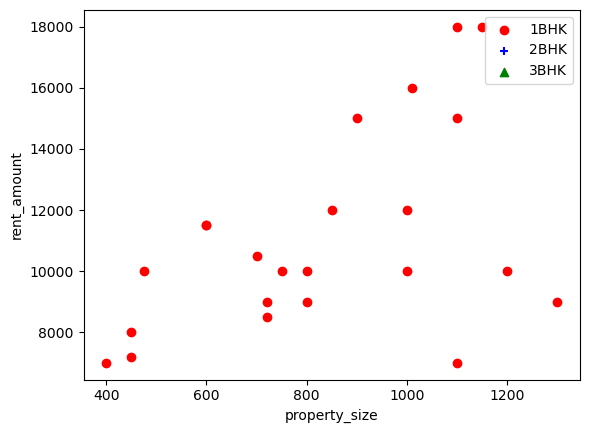

In [68]:
plot_scatter_chart(df5,'zamistanpur_hyderabad')

In [69]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for locality, locality_df in df.groupby('localityId'):
        bhk_stats = {}
        for bhk, bhk_df in locality_df.groupby('type_bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.rent_per_sqft),
                'std': np.std(bhk_df.rent_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in locality_df.groupby('type_bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.rent_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [70]:
df6 = remove_bhk_outliers(df5)
df6

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance,rent_per_sqft
4,hitech_city_hyderabad,1,2,2,0,1,1,1250,0,0,2,32500,2000,26.000000
5,serilingampally_hyderabad,2,3,3,0,1,1,1517,1,1,2,33000,2700,21.753461
9,toli_chowki_hyderabad,1,2,2,3,1,2,950,0,0,2,14000,0,14.736842
16,mehdipatnam_hyderabad,1,2,2,0,0,0,1100,0,0,2,20000,0,18.181818
23,new_malakpet_hyderabad,2,2,2,0,1,1,1500,0,0,2,20000,1200,13.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,erragadda_hyderabad,0,0,1,3,1,2,450,0,0,3,8000,0,17.777778
19100,nizampet_hyderabad,2,2,2,0,1,0,1380,0,0,2,25000,300,18.115942
19103,moosapet_hyderabad,0,0,1,3,0,2,420,0,0,3,8000,0,19.047619
19105,rai_durg_hyderabad,0,0,1,0,1,2,500,0,0,3,8500,500,17.000000


In [71]:
df7= df6.drop('rent_per_sqft',axis=1)

In [72]:
df7

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,rent_amount,maintenance
4,hitech_city_hyderabad,1,2,2,0,1,1,1250,0,0,2,32500,2000
5,serilingampally_hyderabad,2,3,3,0,1,1,1517,1,1,2,33000,2700
9,toli_chowki_hyderabad,1,2,2,3,1,2,950,0,0,2,14000,0
16,mehdipatnam_hyderabad,1,2,2,0,0,0,1100,0,0,2,20000,0
23,new_malakpet_hyderabad,2,2,2,0,1,1,1500,0,0,2,20000,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,erragadda_hyderabad,0,0,1,3,1,2,450,0,0,3,8000,0
19100,nizampet_hyderabad,2,2,2,0,1,0,1380,0,0,2,25000,300
19103,moosapet_hyderabad,0,0,1,3,0,2,420,0,0,3,8000,0
19105,rai_durg_hyderabad,0,0,1,0,1,2,500,0,0,3,8500,500


In [73]:
dummies= pd.get_dummies(df7.localityId)
dummies.head()

,adikmet_hyderabad,almasguda_hyderabad,amberpet_hyderabad,ameerpet_hyderabad,attapur_hyderabad,badangpet_hyderabad,badesahebguda_hyderabad,balakampet_hyderabad,balanagar_hyderabad,balapur_hyderabad,...,turkayamjal_hyderabad,uppal_hyderabad,upparpally_hyderabad,venkat_nagar_colony_hyderabad,west_marredpally_hyderabad,whisper_valley_hyderabad,yapral_hyderabad,yella_reddy_guda_hyderabad,yousufguda_hyderabad,zamistanpur_hyderabad
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df8= pd.concat([df7,dummies],axis=1)
df8.to_csv('data/cleaned_data.csv',index=False)

In [76]:
df8

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,...,turkayamjal_hyderabad,uppal_hyderabad,upparpally_hyderabad,venkat_nagar_colony_hyderabad,west_marredpally_hyderabad,whisper_valley_hyderabad,yapral_hyderabad,yella_reddy_guda_hyderabad,yousufguda_hyderabad,zamistanpur_hyderabad
4,hitech_city_hyderabad,1,2,2,0,1,1,1250,0,0,...,0,0,0,0,0,0,0,0,0,0
5,serilingampally_hyderabad,2,3,3,0,1,1,1517,1,1,...,0,0,0,0,0,0,0,0,0,0
9,toli_chowki_hyderabad,1,2,2,3,1,2,950,0,0,...,0,0,0,0,0,0,0,0,0,0
16,mehdipatnam_hyderabad,1,2,2,0,0,0,1100,0,0,...,0,0,0,0,0,0,0,0,0,0
23,new_malakpet_hyderabad,2,2,2,0,1,1,1500,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,erragadda_hyderabad,0,0,1,3,1,2,450,0,0,...,0,0,0,0,0,0,0,0,0,0
19100,nizampet_hyderabad,2,2,2,0,1,0,1380,0,0,...,0,0,0,0,0,0,0,0,0,0
19103,moosapet_hyderabad,0,0,1,3,0,2,420,0,0,...,0,0,0,0,0,0,0,0,0,0
19105,rai_durg_hyderabad,0,0,1,0,1,2,500,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df8=df8.drop('localityId',axis=1)
df8

,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,...,turkayamjal_hyderabad,uppal_hyderabad,upparpally_hyderabad,venkat_nagar_colony_hyderabad,west_marredpally_hyderabad,whisper_valley_hyderabad,yapral_hyderabad,yella_reddy_guda_hyderabad,yousufguda_hyderabad,zamistanpur_hyderabad
4,1,2,2,0,1,1,1250,0,0,2,...,0,0,0,0,0,0,0,0,0,0
5,2,3,3,0,1,1,1517,1,1,2,...,0,0,0,0,0,0,0,0,0,0
9,1,2,2,3,1,2,950,0,0,2,...,0,0,0,0,0,0,0,0,0,0
16,1,2,2,0,0,0,1100,0,0,2,...,0,0,0,0,0,0,0,0,0,0
23,2,2,2,0,1,1,1500,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,0,0,1,3,1,2,450,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19100,2,2,2,0,1,0,1380,0,0,2,...,0,0,0,0,0,0,0,0,0,0
19103,0,0,1,3,0,2,420,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19105,0,0,1,0,1,2,500,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df8.columns

Index(['type_bhk', 'balconies', 'bathroom', 'parking', 'lift',
       'furnishingDesc', 'property_size', 'gym', 'swimmingPool', 'waterSupply',
       ...
       'turkayamjal_hyderabad', 'uppal_hyderabad', 'upparpally_hyderabad',
       'venkat_nagar_colony_hyderabad', 'west_marredpally_hyderabad',
       'whisper_valley_hyderabad', 'yapral_hyderabad',
       'yella_reddy_guda_hyderabad', 'yousufguda_hyderabad',
       'zamistanpur_hyderabad'],
      dtype='object', length=161)

In [124]:
columns_to_standaradize=['maintenance','property_size']
df8[columns_to_standaradize]=sc.fit_transform(df8[columns_to_standaradize])

In [125]:
df8

,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,gym,swimmingPool,waterSupply,...,turkayamjal_hyderabad,uppal_hyderabad,upparpally_hyderabad,venkat_nagar_colony_hyderabad,west_marredpally_hyderabad,whisper_valley_hyderabad,yapral_hyderabad,yella_reddy_guda_hyderabad,yousufguda_hyderabad,zamistanpur_hyderabad
4,1,2,2,0,1,1,0.597411,0,0,2,...,0,0,0,0,0,0,0,0,0,0
5,2,3,3,0,1,1,1.107585,1,1,2,...,0,0,0,0,0,0,0,0,0,0
9,1,2,2,3,1,2,0.024182,0,0,2,...,0,0,0,0,0,0,0,0,0,0
16,1,2,2,0,0,0,0.310797,0,0,2,...,0,0,0,0,0,0,0,0,0,0
23,2,2,2,0,1,1,1.075102,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,0,0,1,3,1,2,-0.931200,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19100,2,2,2,0,1,0,0.845810,0,0,2,...,0,0,0,0,0,0,0,0,0,0
19103,0,0,1,3,0,2,-0.988523,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19105,0,0,1,0,1,2,-0.835662,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X = df8.drop(['rent_amount'],axis=1)
y = df8.rent_amount


In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [128]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [129]:
lr.fit(X_train,y_train)

LinearRegression()

In [130]:
y_pred=lr.predict(X_test)

In [131]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8394484582516422